In [2]:
import numpy as np
import statistics #Pacote básico de estatisticas do Python
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # organiza as datas no df de forma automática
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("IPCA - %a.m..xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df2 = pd.read_excel("IPCA - 12 meses (%a.m.).xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df3 = pd.read_excel("PIB Ac. 12 meses - R$ mi.xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])

In [4]:
df = df.merge(df2, on = "Data") \
                    .merge(df3, on = "Data")

In [5]:
df

,IPCA - %a.m.,Acumulado,Numero indice,Selic,SelicR,Serie tratada,IPCA - 12 meses (%a.m.),PIB Ac. 12 meses - R$ mi,PibR,NFSP,NFSP Acumulada
Data,,,,,,,,,,,
2003-01-01,2.25,2.250000,34.078930,25.06,9.2542,14.7022,14.47,1502123.5,4423465.4,-7748.80,-48763.52
2003-02-01,1.57,2.285325,34.613969,25.68,8.4878,13.9358,15.85,1522029.5,4412803.7,-6958.50,-51066.28
2003-03-01,1.23,2.313434,35.039721,26.32,8.3616,13.8096,16.57,1543732.2,4421343.6,-4621.34,-51462.26
2003-04-01,0.97,2.335875,35.379606,26.32,8.1792,13.6272,16.77,1564349.5,4437350.5,-11478.36,-55840.39
2003-05-01,0.61,2.350124,35.595422,26.31,7.7406,13.1886,17.24,1580855.1,4456981.8,-4788.31,-57077.43
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,0.87,6.339099,96.013210,5.01,-4.2576,1.1904,9.68,8335657.7,8681782.1,-16728.60,130345.70
2021-09-01,1.16,6.412633,97.126963,5.43,-4.3687,1.0793,10.25,8433106.5,8682559.6,-12933.47,52853.65
2021-10-01,1.25,6.492791,98.341050,6.30,-3.9510,1.4970,10.67,8516030.1,8659690.0,-35399.36,20406.80


In [6]:
data = pd.date_range("2003-01-01", periods = 228, freq = "MS")
ipca = df["IPCA - %a.m."]
ipca12 = df["IPCA - 12 meses (%a.m.)"]
pib = df["PIB Ac. 12 meses - R$ mi"]
numero_indice = df["Numero indice"]
selic = df["Selic"]
selicr = df["SelicR"]
nec = df["NFSP"]
necac = df["NFSP Acumulada"]

serie = df["Serie tratada"] # dados da selic real, eliminando os negativos usando xn - xnmin + 1

In [7]:
#Função para definir a distribuição de frequência, prequel para o histograma
def ac(x) :
    at = max(x) - min(x)
    ki = round(np.sqrt(pd.Series.count(x)))
    h = round(at/ki,2)

    return "Amplitude total = " + str(at),"N. de classes = " + str(ki), "Amplitude de classes = " + str(h)

In [8]:
#Função da estatistica descritica
from scipy import stats

def stat_desc(x) :
    minx = "Mínimo: " + str(x.min())
    maxx = "Máximo: " + str(x.max())
    count = "Observações: " + str(len(x))
    median = "Mediana: " + str(statistics.median(x))
    var = "Variancia: " + str(statistics.variance(x))
    coefvar = "Coeficiente de Variação: " + str(stats.variation(x))
    ermed = "Erro Padrão da Média: " + str(stats.mstats.sem(x))
    mean = "Media: " + str(statistics.mean(x))
    desv = "Desvio Padrão: " + str(np.std(x))
    mad = "Desvio absoluto médio: " + str(pd.Series.mad(x))

    return print(count + "\n" 
                 + minx + "\n" 
                 + maxx + "\n" 
                 + mean + "\n" 
                 + median + "\n" 
                 + var + "\n" 
                 + coefvar + "\n"
                 + desv + "\n" 
                 + mad + "\n" 
                 + ermed + "\n")

In [9]:
# Teste de normalidade dos dados, QQ-Plot, Curtose e Shapiro-Wilk

def norm_test(x) :
    curtose = stats.kurtosis(x)
    base = 3
    if curtose == base :
        print("Curtose = %.3f," % curtose + " Distribuição Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
    elif curtose > 3 :
        print("Curtose = %.3f," % curtose + " Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
    else:
         print("Curtose = %.3f," % curtose + " Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)")

    print("\n")

    assim = stats.skew(x)
    base1 = 0
    if assim == base1 :
        print("Perfeitamente simetrica = %.3f," % assim)
    elif assim > base1 :
        print("Assimetria negativa = %.3f," % assim + "Concentração a esquerda da média")
    else:
        print("Assimetria positiva = %.3f," % curtose + " Concentração a direita da média")

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.

    print("\n"+"Teste de Jarque-Bera")
    stat, p = stats.jarque_bera(x)
    print('Estatistica = %.3f, p-valor = %.10f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")
        
# Teste de Shapiro-Wilk, usando a função de resposta para o resultado do teste.        
    print("\n"+"Teste de Shapiro")

    stat1,p1 = stats.shapiro(x)

    print('Estatistica = %.3f, p-valor = %.10f' % (stat1, p1))
    alpha = 0.05
    if p1 > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")
    
    #Refatorar o gráfico
    #sm.qqplot(x, line='45')

    return norm_test

In [10]:
#taxas de crescimento, PIB real e nominal

def txcresc (x):
    n=len(x)
    t=np.arange(1,n+1,1)
    y = np.array(x)
    ylog = np.log(y)
    curve = np.polyfit(t, ylog, 1)
    txp = ((x[-1]/x[0])-1)*100 #Taxa de crescimento nominal do período completo
    txma = ((x[-1]-x[0])/(x[0]*n))*100
    txmg = (((x[-1]/x[0])**(1/n))-1)*100
    txlog = round((curve[0] * 100),5)

    #Previsão com matemática financeira:
    vfxa = x[-1]*(1+(txma/100)) # aritmética
    vfxg = x[-1]*(1+(txmg/100)) #geométrica
    vfxlog = x[-1]*(1+(txlog/100))

    return print("Taxa de crescimento nominal = %.4f" % txp + "\n"
                 + "Taxa de crescimento média aritmética = %.4f" % txma
                 + "\n" + "Taxa de crescimento média geométrica = %.4f" % txmg
                 + "\n" + "Taxa de crescimento média log = %.4f" % txlog + "\n"
                 + "Previsão Aritmética = %.2f" % vfxa + "\n"
                 + "Previsão Geométrica = %.2f" % vfxg + "\n"
                 + "Previsão Log = %.2f" % vfxlog)

('Amplitude total = 2.63', 'N. de classes = 15', 'Amplitude de classes = 0.18')


Text(0.5, 1.0, 'Histograma e frequencia do IPCA')

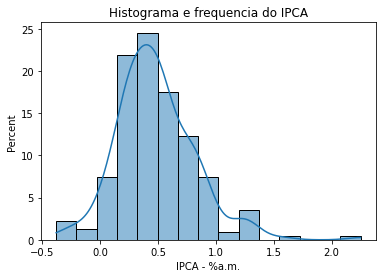

In [11]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_ipca = ac(ipca)
k = round(np.sqrt(pd.Series.count(ipca))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_ipca)

sns.histplot(x=ipca,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do IPCA")

('Amplitude total = 17.3997', 'N. de classes = 15', 'Amplitude de classes = 1.16')


Text(0.5, 1.0, 'Histograma e frequencia da Selic Real')

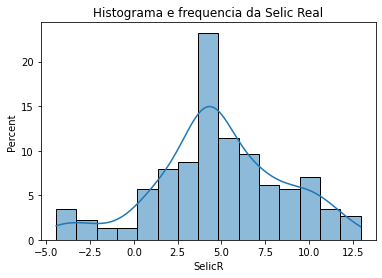

In [12]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_selic = ac(selicr)
k = round(np.sqrt(pd.Series.count(selicr))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_selic)

sns.histplot(x=selicr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia da Selic Real")

('Amplitude total = 24.42', 'N. de classes = 15', 'Amplitude de classes = 1.63')


Text(0.5, 1.0, 'Histograma e frequencia da Selic nominal')

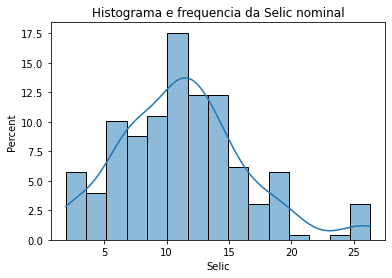

In [13]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_selic = ac(selic)
k = round(np.sqrt(pd.Series.count(selic))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_selic)

sns.histplot(x=selic,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia da Selic nominal")

('Amplitude total = 7172339.6', 'N. de classes = 15', 'Amplitude de classes = 478155.97') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Nominal')

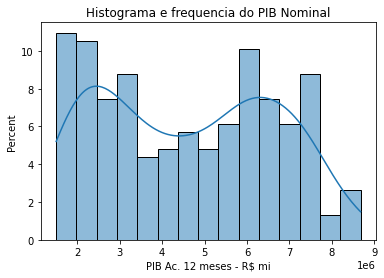

In [14]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_pib = ac(pib)
print(freq_pib, "\n")

k = round(np.sqrt(pd.Series.count(pib)))
sns.histplot(x=pib,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Nominal")

('Amplitude total = 4347920.999999999', 'N. de classes = 15', 'Amplitude de classes = 289861.4') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Real')

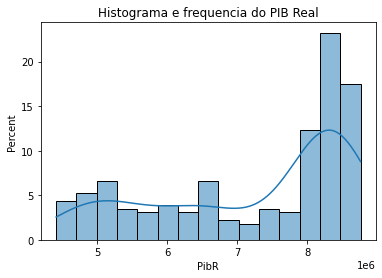

In [15]:
#Disposição do histogramas com as distribuições
pibr = df["PibR"]

freq_pibr= ac(pibr) # reiterando o função de frequencia utilizada anteriormente
print(freq_pibr, "\n")

k = round(np.sqrt(pd.Series.count(pibr)))
sns.histplot(x=pibr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Real")

Text(0.5, 1.0, 'IPCA Acumulada - (%a.a.)')

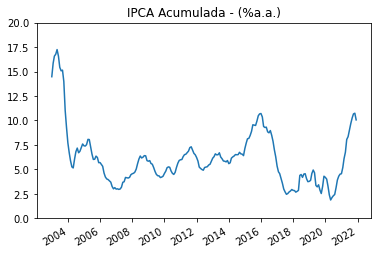

In [16]:
fig, ax = plt.subplots(1,1)

ax.plot(data,ipca12, linewidth = 1.5)
ax.set(ylim=(0.0, 20))
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title('IPCA Acumulada - (%a.a.)')

Text(0.5, 1.0, 'Evolução PIB Nominal - 2003 a 2022 em R$')

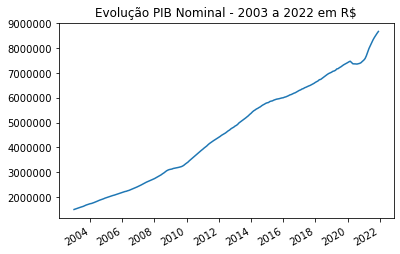

In [17]:
fig, ax = plt.subplots()

plt.ticklabel_format(style='plain')
ax.plot(data,pib, linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("Evolução PIB Nominal - 2003 a 2022 em R$")

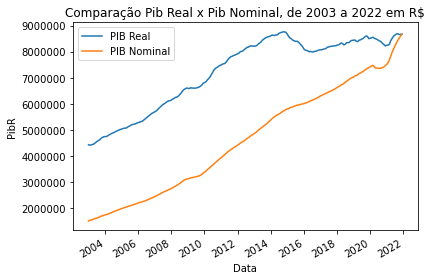

In [18]:
from textwrap import wrap
fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=df, x="Data", y="PibR",dashes=False, label = "PIB Real")
sns.lineplot(data=df, x="Data", y="PIB Ac. 12 meses - R$ mi", label = "PIB Nominal")
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Pib Real x Pib Nominal, de 2003 a 2022 em R$", 60)))
fig.tight_layout()

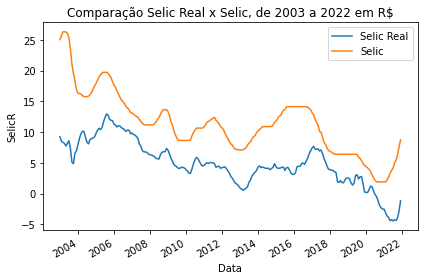

In [19]:
from textwrap import wrap
fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=df, x="Data", y="SelicR",dashes=False, label = "Selic Real")
sns.lineplot(data=df, x="Data", y="Selic", label = "Selic")
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Selic Real x Selic, de 2003 a 2022 em R$", 60)))
fig.tight_layout()

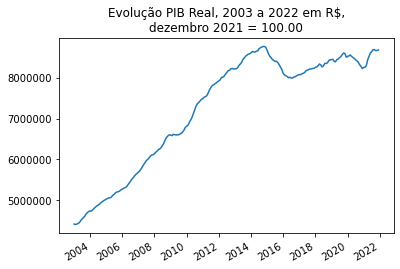

In [20]:
fig, ax = plt.subplots()

plt.ticklabel_format(style='plain')
ax.plot(data,pibr, linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
title = ax.set_title("\n".join(wrap("Evolução PIB Real, 2003 a 2022 em R$, dezembro 2021 = 100.00", 40)))

In [21]:
stat_desc(pib)

Observações: 228
Mínimo: 1502123.5
Máximo: 8674463.1
Media: 4612423.487719298
Mediana: 4606582.65
Variancia: 4186918143477.958
Coeficiente de Variação: 0.4426531562520616
Desvio Padrão: 2041703.8148100893
Desvio absoluto médio: 1815480.5614035085
Erro Padrão da Média: 135512.64172720484



In [22]:
stat_desc(pibr)

Observações: 228
Mínimo: 4412803.7
Máximo: 8760724.7
Media: 7227956.58377193
Mediana: 8004980.9
Variancia: 1938250333356.0217
Coeficiente de Variação: 0.19219182181844444
Desvio Padrão: 1389154.1438597466
Desvio absoluto médio: 1243558.9879232056
Erro Padrão da Média: 92201.39886854151



In [23]:
stat_desc(ipca)

Observações: 228
Mínimo: -0.38
Máximo: 2.25
Media: 0.483640350877193
Mediana: 0.445
Variancia: 0.11593514761573538
Coeficiente de Variação: 0.7024744568443447
Desvio Padrão: 0.33974499279046444
Desvio absoluto médio: 0.25350530932594634
Erro Padrão da Média: 0.022549667171439563



In [24]:
stat_desc(ipca12)

Observações: 228
Mínimo: 1.88
Máximo: 17.24
Media: 6.1275
Mediana: 5.734999999999999
Variancia: 8.230336013215858
Coeficiente de Variação: 0.46716572100183423
Desvio Padrão: 2.8625579554387404
Desvio absoluto médio: 2.0085745614035084
Erro Padrão da Média: 0.18999464458306448



In [25]:
stat_desc(selic)

Observações: 228
Mínimo: 1.9
Máximo: 26.32
Media: 11.294824561403509
Mediana: 11.16
Variancia: 25.785093801684827
Coeficiente de Variação: 0.4485908111691871
Desvio Padrão: 5.066754512013658
Desvio absoluto médio: 3.86007540781779
Erro Padrão da Média: 0.3362923083777805



In [26]:
stat_desc(selicr)

Observações: 228
Mínimo: -4.4448
Máximo: 12.9549
Media: 4.864033771929825
Mediana: 4.46045
Variancia: 13.567639569999807
Coeficiente de Variação: 0.7556158728512637
Desvio Padrão: 3.67534112415478
Desvio absoluto médio: 2.797534991535858
Erro Padrão da Média: 0.24394095821835737



In [27]:
norm_test(pib)

Curtose = -1.313, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 0.082,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 16.643, p-valor = 0.0002432549
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.937, p-valor = 0.0000000267
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [28]:
norm_test(pibr)

Curtose = -1.065, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria positiva = -1.065, Concentração a direita da média

Teste de Jarque-Bera
Estatistica = 28.300, p-valor = 0.0000007157
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.846, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [29]:
norm_test(ipca)

Curtose = 3.008, Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)


Assimetria negativa = 0.938,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 119.420, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.954, p-valor = 0.0000011611
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [30]:
norm_test(ipca12)

Curtose = 3.528, Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)


Assimetria negativa = 1.660,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 222.925, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.860, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [31]:
norm_test(selic)

Curtose = 0.656, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 0.584,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 17.069, p-valor = 0.0001965779
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.968, p-valor = 0.0000440775
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [32]:
norm_test(selicr)

Curtose = 0.110, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria positiva = 0.110, Concentração a direita da média

Teste de Jarque-Bera
Estatistica = 2.082, p-valor = 0.3531437888
A amostra apresenta distribuição normal (Falha em rejeitar H0)

Teste de Shapiro
Estatistica = 0.976, p-valor = 0.0007182815
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

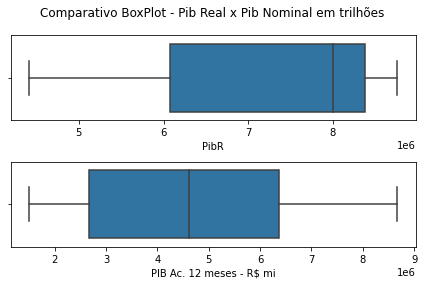

In [33]:
#Box-Plot do PIB real x PIB Nominal
fig, ax = plt.subplots(2)

fig.suptitle('Comparativo BoxPlot - Pib Real x Pib Nominal em trilhões')

sns.boxplot(data = df, x=pibr, ax=ax[0])
sns.boxplot(data = df, x=pib, ax=ax[1])

plt.tight_layout()

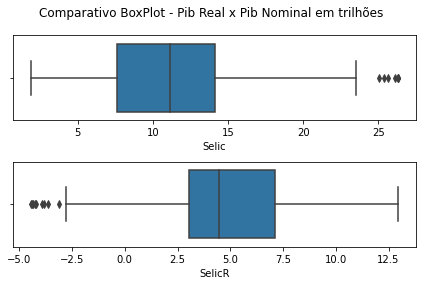

In [34]:
#Box-Plot do PIB real x PIB Nominal
fig, ax = plt.subplots(2)

fig.suptitle('Comparativo BoxPlot - Selic Real x Pib Selic em %')

sns.boxplot(data = df, x=selic, ax=ax[0])
sns.boxplot(data = df, x=selicr, ax=ax[1])

plt.tight_layout()

In [35]:
print("Variável PIB Nominal")
txcresc(pib)

print("\n")
print("Variável PIB Real")

txcresc(pibr)

print("\n")
print("Variável IPCA AC.")

txcresc(ipca12)

print("\n")
print("Variável Selic.")

txcresc(selic)

Variável PIB Nominal
Taxa de crescimento nominal = 477.4800
Taxa de crescimento média aritmética = 2.0942
Taxa de crescimento média geométrica = 0.7720
Taxa de crescimento média log = 0.7517
Previsão Aritmética = 8856124.63
Previsão Geométrica = 8741433.91
Previsão Log = 8739671.64


Variável PIB Real
Taxa de crescimento nominal = 96.1011
Taxa de crescimento média aritmética = 0.4215
Taxa de crescimento média geométrica = 0.2958
Taxa de crescimento média log = 0.2901
Previsão Aritmética = 8711025.61
Previsão Geométrica = 8700123.36
Previsão Log = 8699625.12


Variável IPCA AC.
Taxa de crescimento nominal = -30.4768
Taxa de crescimento média aritmética = -0.1337
Taxa de crescimento média geométrica = -0.1593
Taxa de crescimento média log = -0.1901
Previsão Aritmética = 10.05
Previsão Geométrica = 10.04
Previsão Log = 10.04


Variável Selic.
Taxa de crescimento nominal = -65.0439
Taxa de crescimento média aritmética = -0.2853
Taxa de crescimento média geométrica = -0.4599
Taxa de crescim

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition, baseada no link time-series-analysis
pib_dec = seasonal_decompose(pibr, model='additive', extrapolate_trend="freq")

#construção do df com os valores da decomposição
plt.rcdefaults()

pib_dec_df = pd.concat([pib_dec.seasonal, pib_dec.trend, pib_dec.resid, pib_dec.observed], axis=1)
pib_dec_df.columns = ['sazonal', 'tendencia', 'residuo', 'valor nominal']
pib_dec_df

,sazonal,tendencia,residuo,valor nominal
Data,,,,
2003-01-01,-10014.011494,4.384867e+06,48612.460940,4423465.4
2003-02-01,-23512.036081,4.413398e+06,22917.964199,4412803.7
2003-03-01,-26748.227555,4.441929e+06,6163.234344,4421343.6
2003-04-01,-26112.402142,4.470459e+06,-6996.512397,4437350.5
2003-05-01,-22932.643396,4.498990e+06,-19075.792472,4456981.8
...,...,...,...,...
2021-08-01,22406.340159,8.428065e+06,231311.190683,8681782.1
2021-09-01,28402.783300,8.431628e+06,222529.171391,8682559.6
2021-10-01,26991.893766,8.435191e+06,197507.384775,8659690.0


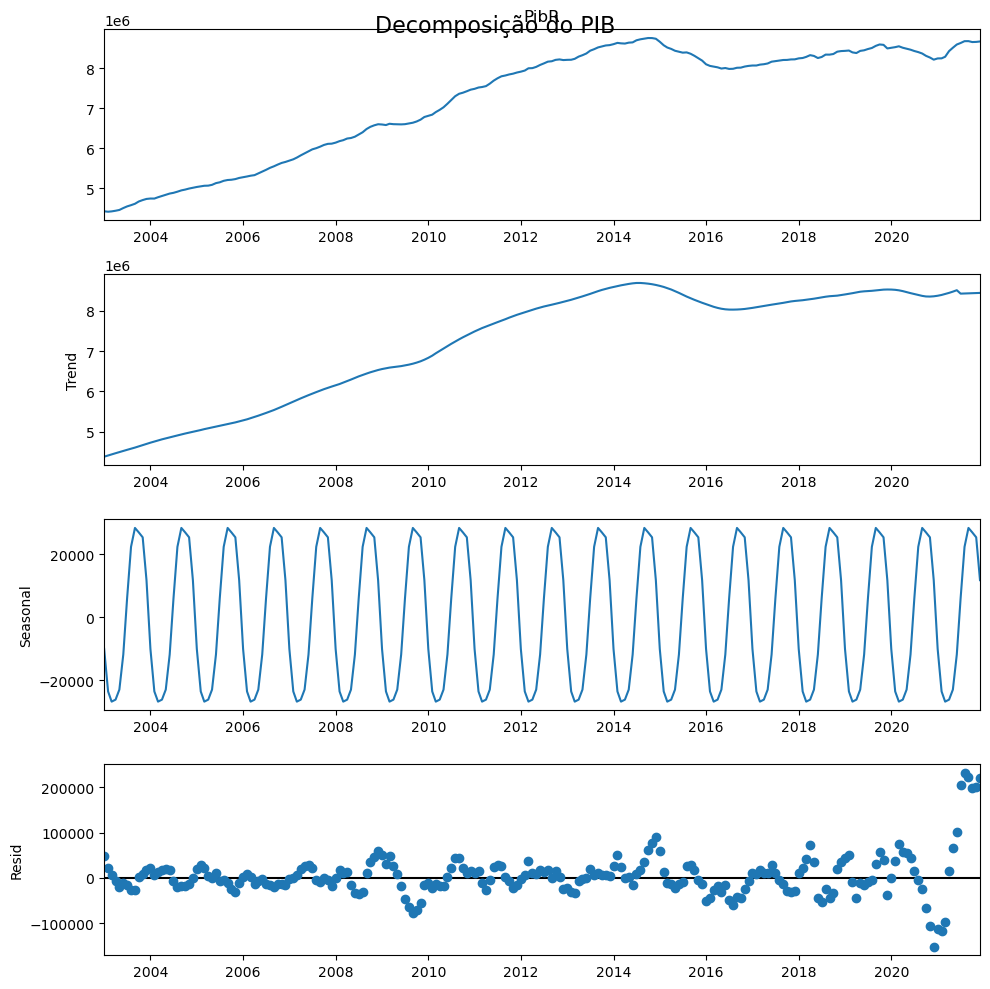

In [37]:
# Plotando a decomposição
plt.rcParams.update({'figure.figsize': (10,10)})
pib_dec.plot().suptitle('Decomposição do PIB', fontsize=16)

plt.rcdefaults()

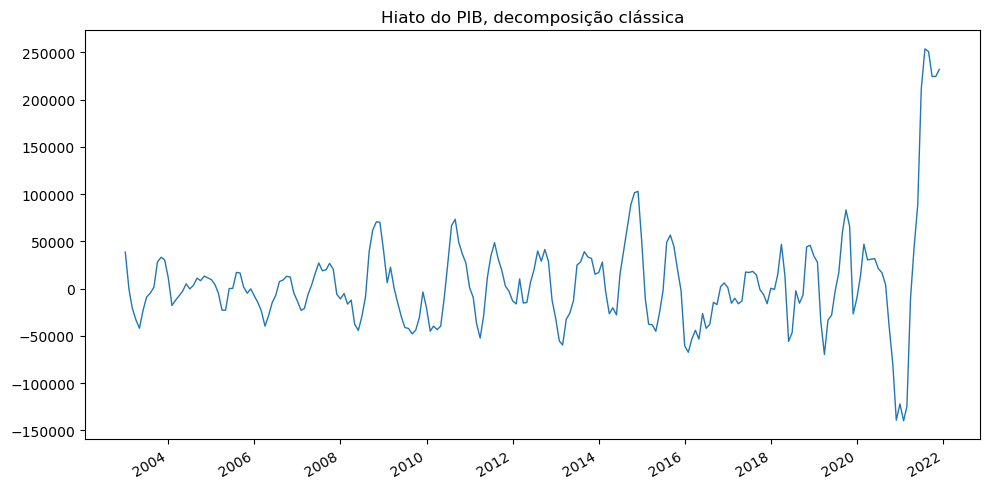

In [38]:
plt.rcParams.update({'figure.figsize': (10,5)})
#Hiato do PIB
pibh = pibr - pib_dec.trend

fig, ax = plt.subplots()

ax.plot(data,pibh, linewidth = 1.0)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Hiato do PIB, decomposição clássica", 60)))
fig.tight_layout()

plt.rcdefaults()

Text(0.5, 1.0, 'Comparativo PIB Real x Tendencia, 2003 a 2021')

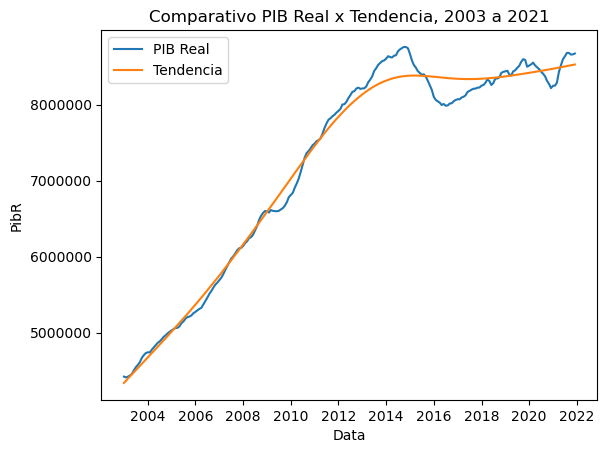

In [39]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle,trend = hpfilter(pibr,129600)

pib_hp = df[["PibR"]].copy()
pib_hp["cycle"] = cycle
pib_hp["tendencia"] = trend

fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=pib_hp, x="Data", y="PibR", dashes=False, label = "PIB Real")
sns.lineplot(data=pib_hp, x="Data", y="tendencia", label = "Tendencia")

ax.set_title("Comparativo PIB Real x Tendencia, 2003 a 2021")

<AxesSubplot:title={'center':'Hiato do produto, filtro HP. 2003 à 2021'}, xlabel='Data', ylabel='hiato'>

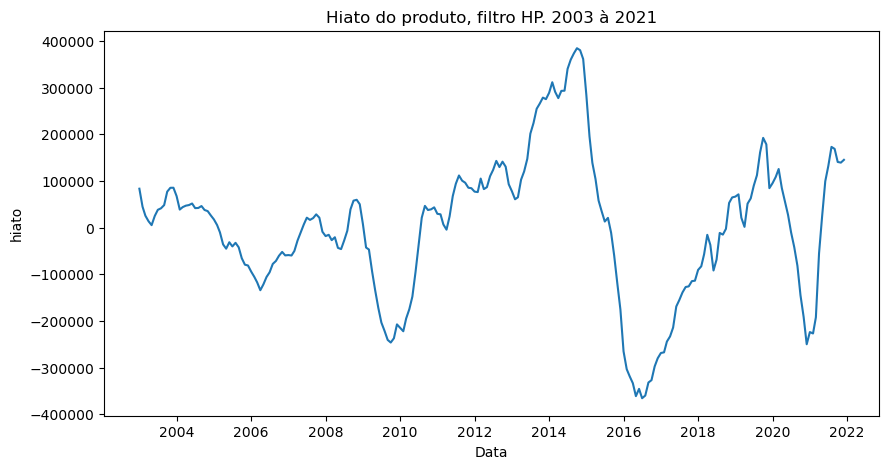

In [40]:
pib_hp["hiato"] = pibr - trend
hiato = pib_hp["hiato"]

plt.rcParams.update({'figure.figsize': (10,5)})
fig,ax = plt.subplots(1,1)
ax.set_title("Hiato do produto, filtro HP. 2003 à 2021")
sns.lineplot(data=pib_hp, x="Data", y="hiato",dashes=False)

In [41]:
#regressão píbr ~ selicr (sem transformação)
import statsmodels.api as sm
import statsmodels.formula.api as smf # Escrever a regressão em forma funcional

reglin = smf.ols(formula= "pibr ~ selicr", data=df).fit()
print(reglin.summary2()) #Para melhor visualização, trocar por summary2()

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.598     
Dependent Variable:     pibr               AIC:                  6892.0641 
Date:                   2022-05-16 21:08   BIC:                  6898.9228 
No. Observations:       228                Log-Likelihood:       -3444.0   
Df Model:               1                  F-statistic:          338.5     
Df Residuals:           226                Prob (F-statistic):   8.07e-47  
R-squared:              0.600              Scale:                7.7936e+11
---------------------------------------------------------------------------
             Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
---------------------------------------------------------------------------
Intercept 8651621.0271 96980.1773  89.2102 0.0000 8460520.0125 8842722.0417
selicr    -292692.1379 15907.5930 -18.3995 0.0000 -324038.3083 -261345.9674
----------------------------------

In [42]:
#teste park, regressão com log do residuo pelo log Selic Real (transformada)
def park_test (y,x):

    step1 = np.power(y.resid,2)
    step2 = np.log(step1)
    step3 = np.log(x)

    y = step2
    x = step3

    x = sm.add_constant(x)

    testpark = sm.OLS(y, x).fit()
    print(testpark.summary2())

    return park_test

park_test(reglin,serie)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.018    
Dependent Variable: y                AIC:                993.8601 
Date:               2022-05-16 21:09 BIC:                1000.7188
No. Observations:   228              Log-Likelihood:     -494.93  
Df Model:           1                F-statistic:        5.212    
Df Residuals:       226              Prob (F-statistic): 0.0234   
R-squared:          0.023            Scale:              4.5377   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          27.5152    0.6239  44.0987  0.0000  26.2857  28.7447
Serie tratada  -0.6207    0.2719  -2.2831  0.0234  -1.1564  -0.0850
------------------------------------------------------------------
Omnibus:               47.506       Durbin-Watson:          0.295 
Prob(Omn

<function __main__.park_test(y, x)>

In [43]:
"""Glejser test - Grandes amostras
x = serie
y = np.absolute(reglog.resid)

#forma1 = x
forma2 = np.sqrt(x)
#forma3 = (1 / x)
#forma4 = (1 / np.sqrt(x))

x = forma2
x = sm.add_constant(x)

glejser_test = sm.OLS(y, x).fit()
print(glejser_test.summary2())"""

'Glejser test - Grandes amostras\nx = serie\ny = np.absolute(reglog.resid)\n\n#forma1 = x\nforma2 = np.sqrt(x)\n#forma3 = (1 / x)\n#forma4 = (1 / np.sqrt(x))\n\nx = forma2\nx = sm.add_constant(x)\n\nglejser_test = sm.OLS(y, x).fit()\nprint(glejser_test.summary2())'

In [44]:
""""#teste Goldfeld-Quandt, falta interpretação
import statsmodels.stats.api as sms
from statsmodels.compat import lzip #zip das variaveis x valores

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(reglog.resid, reglog.model.exog)
lzip(name, test)"""

'"#teste Goldfeld-Quandt, falta interpretação\nimport statsmodels.stats.api as sms\nfrom statsmodels.compat import lzip #zip das variaveis x valores\n\nname = ["F statistic", "p-value"]\ntest = sms.het_goldfeldquandt(reglog.resid, reglog.model.exog)\nlzip(name, test)'

In [45]:
"""#teste Breush-Pagan
import statsmodels.stats.api as sms
from statsmodels.compat import lzip #zip das variaveis x valores

print("Breush-Pagan para heterodacidade")

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(reglog.resid, reglog.model.exog)
lzip(name, test)"""

'#teste Breush-Pagan\nimport statsmodels.stats.api as sms\nfrom statsmodels.compat import lzip #zip das variaveis x valores\n\nprint("Breush-Pagan para heterodacidade")\n\nname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]\ntest = sms.het_breuschpagan(reglog.resid, reglog.model.exog)\nlzip(name, test)'

In [46]:
"""#teste white

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.het_white(reglog.resid, reglog.model.exog)
lzip(name, test)"""

'#teste white\n\nname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]\ntest = sm.stats.diagnostic.het_white(reglog.resid, reglog.model.exog)\nlzip(name, test)'

In [47]:
"""#teste durbin watson, alta correlação positiva
name = ["DW"]
test = sm.stats.stattools.durbin_watson(reglog.resid)

print(name, test)"""

'#teste durbin watson, alta correlação positiva\nname = ["DW"]\ntest = sm.stats.stattools.durbin_watson(reglog.resid)\n\nprint(name, test)'

In [48]:
"""# teste de ARCH

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.het_arch(reglog.resid)
lzip(name, test)"""

'# teste de ARCH\n\nname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]\ntest = sm.stats.diagnostic.het_arch(reglog.resid)\nlzip(name, test)'

In [49]:
"""# LM-Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.acorr_lm(reglog.resid)
lzip(name, test)"""

'# LM-Test\nname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]\ntest = sm.stats.diagnostic.acorr_lm(reglog.resid)\nlzip(name, test)'

In [50]:
"""import scipy

# teste de normalidade dos resíduos, jarque-Bera e Shapiro-Wilk

norm_test(reglog.resid)

scipy.stats.jarque_bera(reglog.resid)"""

'import scipy\n\n# teste de normalidade dos resíduos, jarque-Bera e Shapiro-Wilk\n\nnorm_test(reglog.resid)\n\nscipy.stats.jarque_bera(reglog.resid)'

In [51]:
"""#teste de Breusch-Godfrey

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.acorr_breusch_godfrey(reglog)

lzip(name, test)"""

'#teste de Breusch-Godfrey\n\nname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]\ntest = sm.stats.diagnostic.acorr_breusch_godfrey(reglog)\n\nlzip(name, test)'

In [52]:
"""#import statsmodels.stats.api as sms
x = selicr
y =  hiato

x = sm.add_constant(x)

is_curve = sm.OLS(y, x).fit()
print(is_curve.summary2())"""

'#import statsmodels.stats.api as sms\nx = selicr\ny =  hiato\n\nx = sm.add_constant(x)\n\nis_curve = sm.OLS(y, x).fit()\nprint(is_curve.summary2())'

In [69]:
# df para regressão IS real
hiato_is = hiato
selicr_is = selicr
necac_is = necac
hiato_is_1 = hiato.shift(1)
hiato_is_2 = hiato.shift(2)
selicr_is_1 = selicr.shift(1)
necac_is_1 = necac.shift(1)

d = {"hiato": hiato_is,
     "juros": selicr_is,
     "hiato_1" : hiato_is_1,
     "hiato_2" : hiato_is_2,
     "juros_1": selicr_is_1,
     "necessidade" : necac_is,
     "necessidade_1" : necac_is_1}

df_is = pd.DataFrame(data = d)
df_is

,hiato,juros,hiato_1,hiato_2,juros_1,necessidade,necessidade_1
Data,,,,,,,
2003-01-01,83231.379978,9.2542,NaN,NaN,NaN,-48763.52,NaN
2003-02-01,44664.483111,8.4878,83231.379978,NaN,9.2542,-51066.28,-48763.52
2003-03-01,25298.544027,8.3616,44664.483111,83231.379978,8.4878,-51462.26,-51066.28
2003-04-01,13397.975874,8.1792,25298.544027,44664.483111,8.3616,-55840.39,-51462.26
2003-05-01,5118.996597,7.7406,13397.975874,25298.544027,8.1792,-57077.43,-55840.39
...,...,...,...,...,...,...,...
2021-08-01,172838.481449,-4.2576,132039.724047,99180.787651,-4.4448,130345.70,234667.95
2021-09-01,168517.471186,-4.3687,172838.481449,132039.724047,-4.2576,52853.65,130345.70
2021-10-01,140542.770956,-3.9510,168517.471186,172838.481449,-4.3687,20406.80,52853.65


In [70]:
e = {"hiato": np.log(hiato_is + 370000),
     "juros": np.log(selicr_is + 6.4448),
     "necessidade": np.log(necac_is + 160000),
     "hiato_1" : np.log(hiato_is.shift(1) + 370000),
     "hiato_2" : np.log(hiato_is.shift(2) + 370000),
     "juros_1": np.log(selicr_is.shift(1) + 6.4448),
     "necessidade_1": np.log(necac_is.shift(1) + 160000)}

df_is_n = pd.DataFrame(data = e)
df_is_n

,hiato,juros,necessidade,hiato_1,hiato_2,juros_1,necessidade_1
Data,,,,,,,
2003-01-01,13.024158,2.753597,11.619414,NaN,NaN,NaN,NaN
2003-02-01,12.935225,2.703547,11.598495,13.024158,NaN,2.753597,11.619414
2003-03-01,12.887397,2.695060,11.594853,12.935225,13.024158,2.703547,11.598495
2003-04-01,12.856829,2.682664,11.553680,12.887397,12.935225,2.695060,11.594853
2003-05-01,12.834999,2.652213,11.541732,12.856829,12.887397,2.682664,11.553680
...,...,...,...,...,...,...,...
2021-08-01,13.204567,0.782622,12.578828,13.126435,13.058743,0.693147,12.885800
2021-09-01,13.196575,0.730491,12.268360,13.204567,13.126435,0.782622,12.578828
2021-10-01,13.143230,0.913808,12.102970,13.196575,13.204567,0.730491,12.268360


In [62]:
res_1 = smf.ols(formula= "hiato ~ hiato_1 + hiato_2 + juros_1", data=df_is).fit()
print(res_1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.977     
Dependent Variable: hiato            AIC:                5189.1188 
Date:               2022-05-16 21:20 BIC:                5202.8009 
No. Observations:   226              Log-Likelihood:     -2590.6   
Df Model:           3                F-statistic:        3212.     
Df Residuals:       222              Prob (F-statistic): 1.60e-182 
R-squared:          0.977            Scale:              5.3903e+08
-------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
Intercept  3528.9416 2596.4326   1.3592 0.1755 -1587.8672 8645.7505
hiato_1       1.5774    0.0527  29.9511 0.0000     1.4736    1.6812
hiato_2      -0.6088    0.0526 -11.5693 0.0000    -0.7125   -0.5051
juros_1    -670.6090  428.6537  -1.5645 0.1191 -1515.3600  174.142

In [71]:
res_2 = smf.ols(formula= "hiato ~ hiato_1 + hiato_2 + juros_1 + necessidade_1", data=df_is_n).fit()
print(res_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.897    
Dependent Variable: hiato            AIC:                -24.8903 
Date:               2022-05-16 21:52 BIC:                -7.7876  
No. Observations:   226              Log-Likelihood:     17.445   
Df Model:           4                F-statistic:        492.2    
Df Residuals:       221              Prob (F-statistic): 8.67e-109
R-squared:          0.899            Scale:              0.051309 
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Intercept        1.4257    0.5573   2.5583  0.0112   0.3274  2.5240
hiato_1          0.8764    0.0672  13.0473  0.0000   0.7440  1.0087
hiato_2          0.0561    0.0668   0.8388  0.4025  -0.0757  0.1878
juros_1         -0.0633    0.0427  -1.4825  0.1396  -0.1475  0.0209
necess